In [61]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from matplotlib import cm
df = pd.read_csv('produksi_minyak_mentah.csv')
df_clean = df.set_index('kode_negara')
df_clean.head()

df_clean = df_clean.drop(['WLD','G20','OEU','EU28','OECD'])
df_clean.reset_index(drop=False,inplace=True)
print(df_clean)




     kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5628         ZWE   2011      0.000
5629         ZWE   2012      0.000
5630         ZWE   2013      0.000
5631         ZWE   2014      0.000
5632         ZWE   2015      0.000

[5633 rows x 3 columns]
<bound method NDFrame.describe of      kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5834         ZWE   2011      0.000
5835         ZWE   2012      0.000
5836         ZWE   2013      0.000
5837         ZWE   2014      0.000
5838         ZWE   2015      0.000

[5839 rows x 3 columns]>


In [11]:
kode_negara = list(df['kode_negara'].unique())
print(f"Kode: {kode_negara}")
total_produksi = []
for kode in kode_negara:
    jumlah_produksi = df[df['kode_negara']==kode]['produksi'].replace(",", "").astype(int)
    total_produksi.append(jumlah_produksi.sum())
print(f"Total Produksi: {total_produksi}")

max_produksi = np.asarray(jumlah_produksi).max()
max_produksi_idx = np.asarray(jumlah_produksi).argmax()


Kode: ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'OEU', 'ALB', 'DZA', 'ARG', 'ARM', 'AZE', 'BGD', 'BLR', 'BIH', 'BRA', 'BRN', 'BGR', 'KHM', 'CHL', 'CHN', 'COL', 'HRV', 'CYP', 'EGY', 'EST', 'ETH', 'GEO', 'GHA', 'HTI', 'HKG', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'LVA', 'LTU', 'MKD', 'MYS', 'MLT', 'MDA', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'ROU', 'RUS', 'SAU', 'SGP', 'SVN', 'ZAF', 'SDN', 'TWN', 'TZA', 'THA', 'UKR', 'ARE', 'URY', 'VNM', 'ZMB', 'WLD', 'SRB', 'MNE', 'EU28', 'G20', 'OECD', 'AGO', 'BHR', 'BEN', 'BOL', 'BWA', 'CMR', 'COG', 'CRI', 'CIV', 'CUB', 'PRK', 'COD', 'DOM', 'ECU', 'SLV', 'ERI', 'GAB', 'GTM', 'HND', 'IRQ', 'JAM', 'JOR', 'KEN', 'KWT', 'KGZ', 'LBN', 'LBY', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'OMN', 'PAN', 'QAT', 'SEN', 'LKA', 'SYR', 'TJK', 'TGO', 'TTO', 'TUN', 'TKM', 'UZB', 'VEN', 'YEM', 'ZWE

In [10]:
tulis_kode = []
for i, kode in enumerate(kode_negara):
    tulis_kode.append(f"{str(i+1)}. {kode}\n")
tulis_kode = ' '.join(map(str, tulis_kode))
tulis_kode

'1. AUS\n 2. AUT\n 3. BEL\n 4. CAN\n 5. CZE\n 6. DNK\n 7. FIN\n 8. FRA\n 9. DEU\n 10. GRC\n 11. HUN\n 12. ISL\n 13. IRL\n 14. ITA\n 15. JPN\n 16. KOR\n 17. LUX\n 18. MEX\n 19. NLD\n 20. NZL\n 21. NOR\n 22. POL\n 23. PRT\n 24. SVK\n 25. ESP\n 26. SWE\n 27. CHE\n 28. TUR\n 29. GBR\n 30. USA\n 31. OEU\n 32. ALB\n 33. DZA\n 34. ARG\n 35. ARM\n 36. AZE\n 37. BGD\n 38. BLR\n 39. BIH\n 40. BRA\n 41. BRN\n 42. BGR\n 43. KHM\n 44. CHL\n 45. CHN\n 46. COL\n 47. HRV\n 48. CYP\n 49. EGY\n 50. EST\n 51. ETH\n 52. GEO\n 53. GHA\n 54. HTI\n 55. HKG\n 56. IND\n 57. IDN\n 58. IRN\n 59. ISR\n 60. KAZ\n 61. LVA\n 62. LTU\n 63. MKD\n 64. MYS\n 65. MLT\n 66. MDA\n 67. MOZ\n 68. NGA\n 69. PAK\n 70. PRY\n 71. PER\n 72. PHL\n 73. ROU\n 74. RUS\n 75. SAU\n 76. SGP\n 77. SVN\n 78. ZAF\n 79. SDN\n 80. TWN\n 81. TZA\n 82. THA\n 83. UKR\n 84. ARE\n 85. URY\n 86. VNM\n 87. ZMB\n 88. WLD\n 89. SRB\n 90. MNE\n 91. EU28\n 92. G20\n 93. OECD\n 94. AGO\n 95. BHR\n 96. BEN\n 97. BOL\n 98. BWA\n 99. CMR\n 100. COG\n 101. 

In [24]:
file_json = pd.read_json('kode_negara_lengkap.json')
df_json = pd.DataFrame.from_dict(file_json)

selain_negara = []
kode_negara = list(df['kode_negara'].unique())
for i in kode_negara:
    if i not in list(df_json['alpha-3']):
        selain_negara.append(i)

for i in selain_negara:
    df = df[df.kode_negara != i]
    if i in kode_negara:
        kode_negara.remove(i)

print(kode_negara)


['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'ALB', 'DZA', 'ARG', 'ARM', 'AZE', 'BGD', 'BLR', 'BIH', 'BRA', 'BRN', 'BGR', 'KHM', 'CHL', 'CHN', 'COL', 'HRV', 'CYP', 'EGY', 'EST', 'ETH', 'GEO', 'GHA', 'HTI', 'HKG', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'LVA', 'LTU', 'MKD', 'MYS', 'MLT', 'MDA', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'ROU', 'RUS', 'SAU', 'SGP', 'SVN', 'ZAF', 'SDN', 'TWN', 'TZA', 'THA', 'UKR', 'ARE', 'URY', 'VNM', 'ZMB', 'SRB', 'MNE', 'AGO', 'BHR', 'BEN', 'BOL', 'BWA', 'CMR', 'COG', 'CRI', 'CIV', 'CUB', 'PRK', 'COD', 'DOM', 'ECU', 'SLV', 'ERI', 'GAB', 'GTM', 'HND', 'IRQ', 'JAM', 'JOR', 'KEN', 'KWT', 'KGZ', 'LBN', 'LBY', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NIC', 'NER', 'OMN', 'PAN', 'QAT', 'SEN', 'LKA', 'SYR', 'TJK', 'TGO', 'TTO', 'TUN', 'TKM', 'UZB', 'VEN', 'YEM', 'ZWE']


In [34]:
nama_negara = []
kode_angka = []
region_json = []
subregion_json = []
for i in range(len(kode_negara)):
    for j in range(len(list(df_json['alpha-3']))):
        if list(df_json['alpha-3'])[j] == kode_negara[i] and list(df_json['name'])[j] not in nama_negara:
            nama_negara.append(list(df_json['name'])[j])
            kode_angka.append(list(df_json['country-code'])[j])
            region_json.append(list(df_json['region'])[j])
            subregion_json.append(list(df_json['sub-region'])[j])

df_lengkap = pd.DataFrame(list(zip(nama_negara, kode_negara, kode_angka, region_json, subregion_json)), columns=['negara', 'alpha-3', 'kode negara', 'region', 'sub-region'])
df_lengkap

,negara,alpha-3,kode negara,region,sub-region
0,Australia,AUS,36,Oceania,Australia and New Zealand
1,Austria,AUT,40,Europe,Western Europe
2,Belgium,BEL,56,Europe,Western Europe
3,Canada,CAN,124,Americas,Northern America
4,Czechia,CZE,203,Europe,Eastern Europe
...,...,...,...,...,...
132,Turkmenistan,TKM,795,Asia,Central Asia
133,Uzbekistan,UZB,860,Asia,Central Asia
134,Venezuela (Bolivarian Republic of),VEN,862,Americas,Latin America and the Caribbean
135,Yemen,YEM,887,Asia,Western Asia


([<matplotlib.lines.Line2D at 0x2999ee99130>],
 Text(0.5, 1.0, 'Grafik Negara Indonesia'),
 Text(0.5, 0, 'Tahun'),
 Text(0, 0.5, 'Produksi'))

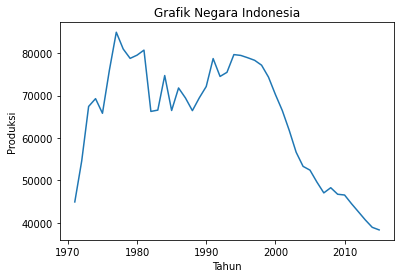

In [69]:
N = input("nama?")

for i in range(len(nama_negara)):
    if nama_negara[i] == N:
        kodenegarahuruf = kode_negara[i]
        kodenegaraangka = kode_angka[i]
        region = region_json[i]
        subregion = subregion_json[i]

# Membuat list baru untuk menampung data produksi negara dan tahunnya
list_produksi = []
list_tahun = []

# Mengambil data produksi dan tahun berdasarkan negara yang dipilih pada
# option dan memasukkannya ke list yang telah dibuat
for i in range(len(list(df_clean['kode_negara']))):
    if kodenegarahuruf == list(df_clean['kode_negara'])[i]:
        list_produksi.append(list(df_clean['produksi'])[i])
        list_tahun.append(list(df_clean['tahun'])[i])

graf1 = plt.plot(list_tahun,list_produksi),plt.title('Grafik Negara '+N),plt.xlabel('Tahun'),plt.ylabel('Produksi')
graf1

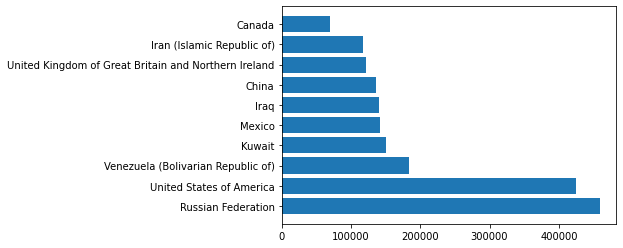

In [66]:
T = int(input("Tahun Berape "))
B1 = int(input("Banyaknya ?"))

df_nomer2 = df_clean.loc[df['tahun'] ==T].sort_values(by=['produksi'], ascending=False)

nama_df2 = []
for i in range(len(list(df_nomer2['kode_negara']))):
    for j in range(len(list(df_lengkap['alpha-3']))):
        if list(df_nomer2['kode_negara'])[i] == list(df_lengkap['alpha-3'])[j]:
            nama_df2.append(list(df_lengkap['negara'])[j])

df_nomer2['negara'] = nama_df2
df_nomer2 = df_nomer2[:B1]

plt.barh(df_nomer2['negara'],df_nomer2['produksi'])
plt.show()

Text(0.5, 1.0, 'Grafik 10 Negara Terbesar')

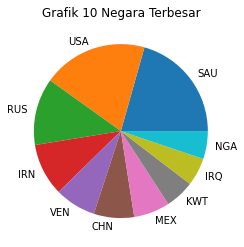

In [67]:
B2 = int(input("Berapa Negara "))
produksi_kumulatif = []

for i in kode_negara:
    n = df_clean.loc[df_clean['kode_negara']==i,'produksi'].sum()
    produksi_kumulatif.append(n)

df_nomer3 = pd.DataFrame(list(zip(kode_negara,produksi_kumulatif)),columns =['kode_negara','produksi_kumulatif']).sort_values(by=['produksi_kumulatif'], ascending=False)
df_nomer3 = df_nomer3[:B2]

negara3 = df_nomer3['kode_negara']
produksi_nomer3 = df_nomer3['produksi_kumulatif']

graf3 = plt.pie(df_nomer3['produksi_kumulatif'],labels=df_nomer3['kode_negara'])
graf3 = plt.title("Grafik "+str(B2)+" Negara Terbesar")
graf3
